In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from data import resample_nba_data as re
from data import clean_and_split_nba_data as clean
from sklearn.linear_model import LinearRegression
from models import plot_validation_curve as vc
from models import eval_model as evm
from joblib import dump
import altair as alt

ImportError: cannot import name 'resample_nba_data' from 'data' (unknown location)

In [6]:
# import os
# import sys
sys.path

['/home/jovyan/work/notebooks',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/home/jovyan/.ipython',
 '/home/jovyan/work']

In [4]:
os.path.abspath(os.path.join('..'))

'/home/jovyan/work'

In [1]:
df = pd.read_csv("../data/raw/train.csv")
df

NameError: name 'pd' is not defined

In [17]:
x_data, x_train, x_val, x_test, y_data , y_train, y_val,  y_test = clean.clean_and_split_nba_data(df)

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'CALC3P%', 'CALCFG%',
       'CALCFT%'],
      dtype='object')


In [18]:
scaler = np.load('../models/sp_wk3_scaler_logistic_regression.joblib',allow_pickle=True)

In [19]:
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)

    model = LinearRegression()

    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)

    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)

        x = data[x_features]
        y = data[y_featue]

        model.fit(data[x_features], data[y_featue])

        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))

    return result

In [20]:
calculateVIF(x_data)

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,CALC3P%,CALCFG%,CALCFT%
VIF,1.692939,13.494565,216.548951,197.185109,83.220899,30.051728,29.579763,68.58087,50.866608,21.890676,72.400261,143.344486,4.325144,3.373008,1.392078,5.679168,1.696666,4.378739,2.097601


In [21]:
x = x_data.drop(['PTS','REB','FGM','FTM','3P Made','MIN'], axis=1)
calculateVIF(x)

,GP,FGA,3PA,FTA,OREB,DREB,AST,STL,BLK,TOV,CALC3P%,CALCFG%,CALCFT%
VIF,1.646472,5.124633,2.094167,3.787726,4.002836,3.754432,3.972429,2.926084,1.386413,5.542465,1.334113,1.563669,1.121485


In [22]:
x_data= x_data.drop(['PTS','REB','FGM','FTM','3P Made','MIN'], axis=1)
x_train= x_train.drop(['PTS','REB','FGM','FTM','3P Made','MIN'], axis=1)
x_test= x_test.drop(['PTS','REB','FGM','FTM','3P Made','MIN'], axis=1)
x_val= x_val.drop(['PTS','REB','FGM','FTM','3P Made','MIN'], axis=1)

In [9]:
x_data= scaler.fit_transform(x_data) 
x_train= scaler.fit_transform(x_train) 
x_test= scaler.fit_transform(x_test) 
x_val= scaler.fit_transform(x_val) 

(LinearRegression(), 0.7025981647460522, 0.7134918225378513)

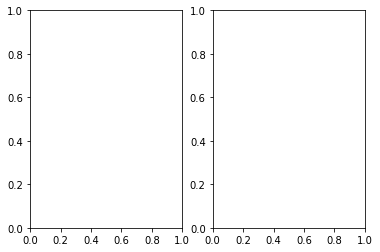

In [23]:
lir=LinearRegression()
evm.eval_model(lir,x_train,y_train,x_val,y_val,False)

In [24]:
dump(lir,  '../models/sp_wk3_linear_reg_model.joblib')

['../models/sp_wk3_linear_reg_model.joblib']

In [25]:
evm.get_performance(lir, x_test, y_test, "Test", True)

ValueError: plot_confusion_matrix only supports classifiers